         X0   Z0        Z1        W0        W1        W2        W3 W4    v0  \
0 -0.962164  0.0  0.312947  0.445896 -0.300716  0.972703  0.939040  2  True   
1  1.425380  0.0  0.162143 -0.144833 -0.034665  0.022650  1.579017  3  True   
2  0.442473  0.0  0.691353  0.008485 -0.403768  0.589445  2.748186  2  True   
3  0.223846  1.0  0.198401  0.640377 -1.583024 -0.110261 -0.200796  2  True   
4  1.506046  1.0  0.082841  0.998364 -0.209118  1.374243  0.592901  2  True   

           y  
0  16.924104  
1  20.649025  
2  20.760261  
3   6.815738  
4  25.888185  
digraph {v0->y;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;X0-> y;}


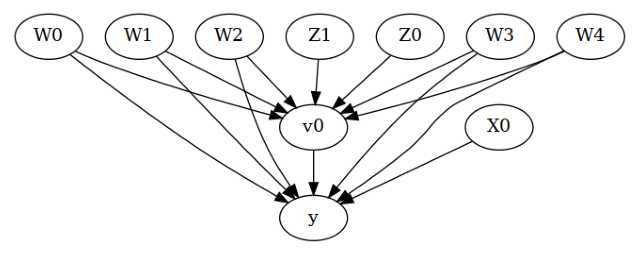

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W1,W4,W3,W2,W0])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W4,W3,W2,W0,U) = P(y|v0,W1,W4,W3,W2,W0)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₀  Z₁]    ⎝d[Z₀  Z₁]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



ValueError: Not enough data to generate at least two strata. This error may be due to a high value of 'clipping_threshold'.

In [8]:
import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
import dowhy.datasets

data = dowhy.datasets.linear_dataset(beta=10, # beta 表示真实的因果效应
        num_common_causes=5, # 混杂因子，用 W 表示，作用于干预变量和结果变量
        num_instruments=2, # 工具变量，用 Z 表示，作用于干预变量（间接影响结果）
        num_effect_modifiers=1, # 效果修改变量，用 X 表示，作用于结果变量
        num_samples=10000, # 样本数量
        treatment_is_binary=True, # 干预为二元变量，用 v 表示
        num_discrete_common_causes=1)
df = data["df"] # DoWhy 使用 pandas 的 dataframe 来载入数据
print(df.head())
print(data["dot_graph"]) # 还可以输出 gml_graph，内容一致只是表达形式不同

# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"],
        instruments=data["instrument_names"], # 官网漏了这一行
        common_causes=data["common_causes_names"],
        effect_modifiers=data["effect_modifier_names"],
        proceed_when_unidentifiable=True)
# INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
model.view_model()

# recognize the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

# estimate the causal effect
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(estimate)
print("Causal Estimate is " + str(estimate.value))